In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
import statsmodels.api as sm

In [2]:
plt.rcParams['axes.labelsize']= 16 
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['legend.fontsize'] = 13

In [3]:
import powerlaw as pl

In [4]:
returns = pd.read_csv('long_series_logret.csv',index_col=0,parse_dates=True)

returns

,NAV
index,
1962-01-03,0.014286
1962-01-04,-0.011891
1962-01-05,0.009524
1962-01-08,-0.014320
1962-01-09,-0.009662
...,...
2020-03-25,0.058730
2020-03-26,0.065813
2020-03-27,-0.120113


In [5]:
returns = returns ['NAV']
returns

index
1962-01-03    0.014286
1962-01-04   -0.011891
1962-01-05    0.009524
1962-01-08   -0.014320
1962-01-09   -0.009662
                ...   
2020-03-25    0.058730
2020-03-26    0.065813
2020-03-27   -0.120113
2020-03-30   -0.099241
2020-03-31    0.006083
Name: NAV, Length: 14661, dtype: float64

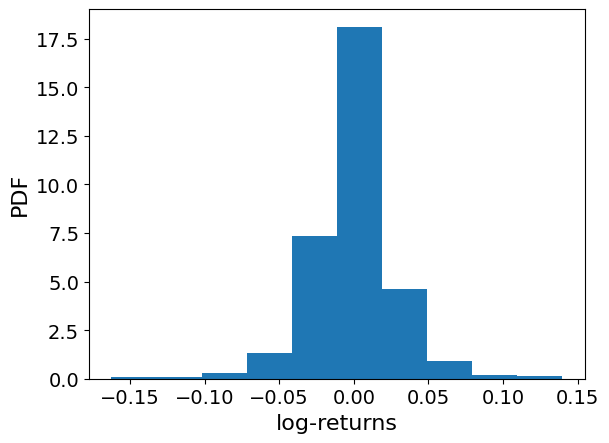

In [6]:
plt.hist(returns, density=True) 
plt.xlabel('log-returns') 
plt.ylabel('PDF')
plt.show ()

In [7]:
abs_returns = abs(returns)
abs_returns

index
1962-01-03    0.014286
1962-01-04    0.011891
1962-01-05    0.009524
1962-01-08    0.014320
1962-01-09    0.009662
                ...   
2020-03-25    0.058730
2020-03-26    0.065813
2020-03-27    0.120113
2020-03-30    0.099241
2020-03-31    0.006083
Name: NAV, Length: 14661, dtype: float64

In [8]:
ft = pl.Fit(abs_returns) 

ft.alpha,ft.xmin

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


(4.118580914552373, 0.0566189282134636)

In [9]:
nu, mean,std = st.t.fit(returns) 
nu

2.6138054246862303

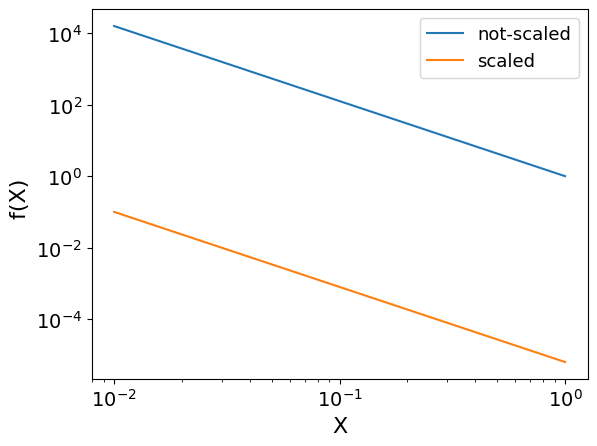

In [10]:
xmin, xmax = 1e-2,1
ymax = 0.1
alpha = -2.1

x= np.linspace(xmin, xmax, 1000)
plt. plot (x, x**alpha, label= 'not-scaled')
c= ymax/xmin**alpha

plt.plot (x, c*x**alpha,label='scaled')
plt.yscale ('log') 
plt.xscale('log')
plt.xlabel ('X') 
plt.ylabel ('f(X) ')
plt. legend () 
plt.show()

In [11]:
def plot_powerlaw(alpha, xmin,xmax, ymax, n_steps=1000) : 
    c = ymax/xmin**alpha
    x = np.linspace (xmin, xmax ,n_steps) 
    return x,c*x**alpha

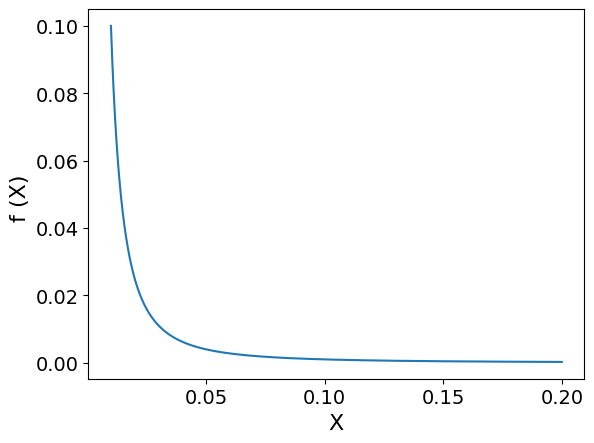

In [12]:
plt.plot(*plot_powerlaw(alpha=-2. ,xmin=0.01, xmax=0.2, ymax=0.1))
plt.xlabel('X')
plt.ylabel ('f (X) ') 
plt.show()

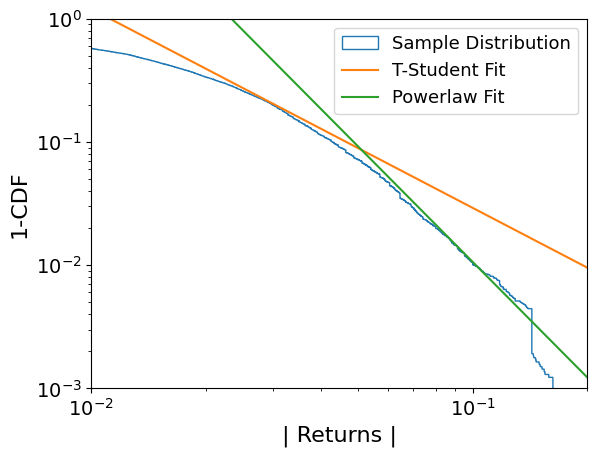

In [13]:
bins = sorted( set( abs_returns ) )
plt.hist(abs_returns ,bins=bins ,cumulative=-1, density=True,histtype='step',label='Sample Distribution')

xmin,xmax = 1e-2,0.2

plt.plot(*plot_powerlaw(1-nu, xmin, xmax ,ymax=1.2) ,label= 'T-Student Fit ' )
plt.plot(*plot_powerlaw(1-ft.alpha, xmin, xmax, ymax=14.) ,label='Powerlaw Fit')

plt.xlim(xmin, xmax) 
plt.ylim([1e-3,1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel ('| Returns |') 
plt.ylabel('1-CDF')
plt. legend ()
plt.show ()

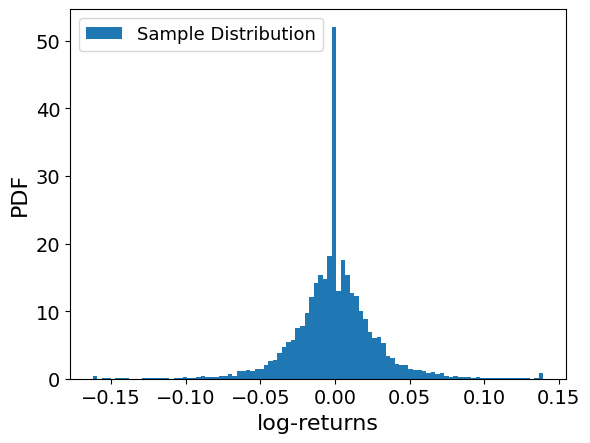

In [14]:
plt. hist (returns, density=True,bins=100,label='Sample Distribution')
plt.xlabel ('log-returns') 
plt.ylabel('PDF')
plt. legend ()
plt. show ()

<function matplotlib.pyplot.show(close=None, block=None)>

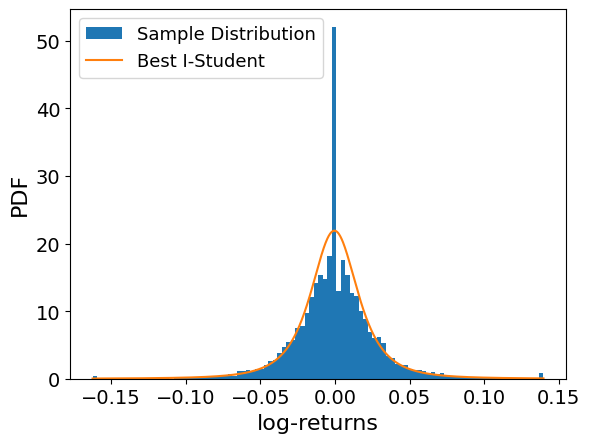

In [15]:
nu, mean,std = st.t.fit(returns)
xmin= np.min(returns)
xmax= np.max(returns)

plt.hist(returns,density=True,bins=100,label= 'Sample Distribution')
x = np.linspace(xmin, xmax, 1000)
plt.plot ( x, st.t.pdf(x, nu, mean,std) ,label= 'Best I-Student' )
plt.xlabel('log-returns') 
plt.ylabel('PDF')
plt.legend()
plt.show


In [16]:
(returns==0).mean()

0.13423368119500717

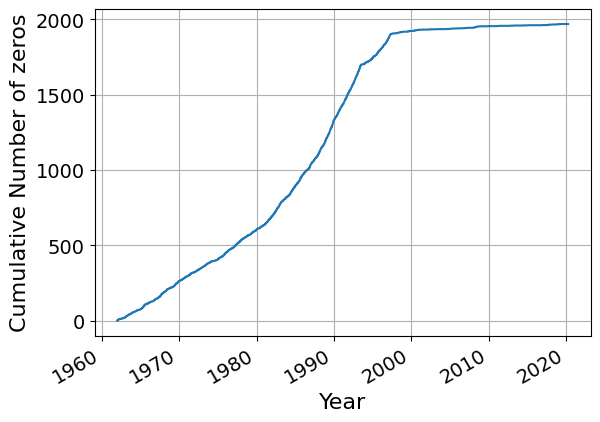

In [17]:
(returns==0).cumsum().plot () 
plt.grid() 
plt.xlabel('Year')
plt.ylabel('Cumulative Number of zeros') 
plt.show ()

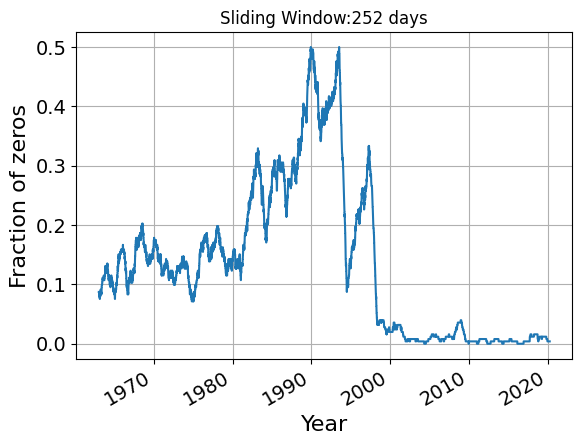

In [18]:
window = 252
(returns==0).rolling(window).mean ().plot()

plt.grid()
plt.xlabel('Year') 
plt.ylabel('Fraction of zeros')
plt.title ('Sliding Window:{} days' .format (window))
plt.show()

In [19]:
returns = returns [returns.index.year>=2000]

In [20]:
(returns==0) . mean ()

0.009032004712350284

In [21]:
abs_returns = abs (returns)
#The powerlaw fit is robust because it tries to fit only the tail 

ft = pl.Fit(abs_returns)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [22]:
ft.alpha,ft. xmin

(3.178660640393109, 0.0334519951427704)

In [23]:
nu,mean,std = st.t.fit(returns)
nu

3.147675681830459

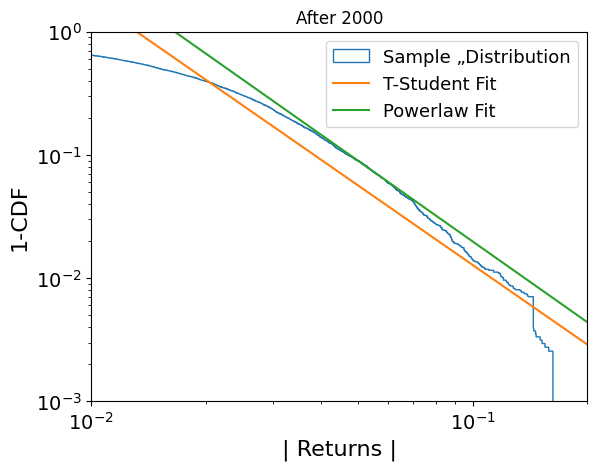

In [24]:
bins = sorted(set(abs_returns))
plt.hist(abs_returns, bins=bins, cumulative=-1, density=True ,histtype='step',label='Sample „Distribution')

xmin,xmax = 1e-2,0.2

plt.plot (*plot_powerlaw(1-nu, xmin, xmax ,ymax=1.8) ,label='T-Student Fit ' )
plt.plot (*plot_powerlaw (1-ft.alpha, xmin, xmax, ymax=3) ,label= 'Powerlaw Fit')

plt.legend()

plt.xscale('log')
plt.yscale ('log')

plt.xlim (xmin, xmax)
plt.ylim([1e-3,1])

plt.xlabel ('| Returns |')
plt.ylabel ('1-CDF') 
plt.title('After 2000') 
plt.show()

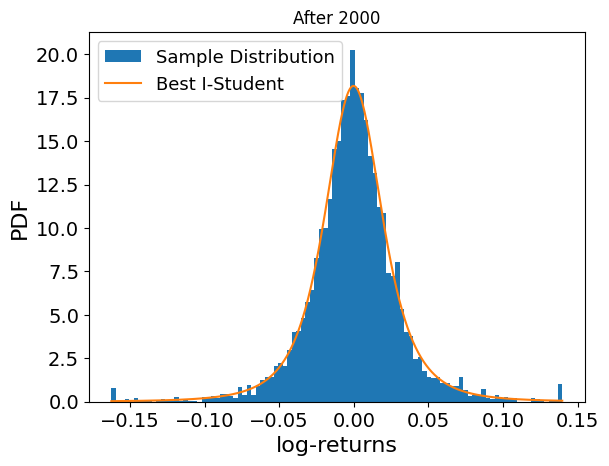

In [25]:
xmin, xmax = np.min(returns) ,np.max (returns)
plt.hist(returns, density=True,bins=100,label= 'Sample Distribution')
x = np. linspace (xmin, xmax, 1000)
plt.plot ( x, st.t.pdf (x, nu,mean ,std) ,label= 'Best I-Student' )
plt.xlabel ('log-returns') 
plt.ylabel ('PDF')
plt.legend ()
plt.title('After 2000') 

plt.show()

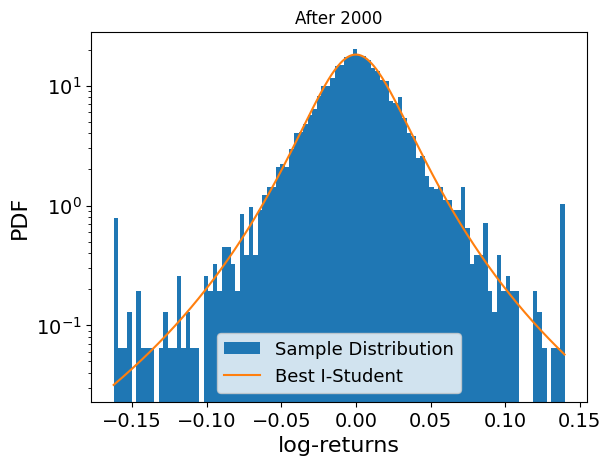

In [26]:
xmin, xmax = np.min(returns), np.max(returns)

plt. hist (returns, density=True ,bins=100, label= 'Sample Distribution')

x = np. linspace (xmin,xmax, 1000)

plt.plot( x, st.t.pdf (x, nu, mean ,std) ,label= 'Best I-Student' )

plt.xlabel ('log-returns') 
plt.ylabel('PDF')
plt. legend ()
plt.yscale('log') 
plt.title('After 2000')
plt.show()

In [27]:
T= returns.shape[0] #Total number of returns
dt = 1000 # sliding windows of 1000 days 
steps = 15 #days

dates = returns.index

estimators =[]
for t in np.arange (0,T-dt,steps):
    r = returns.iloc[t:t+dt]
    nu,_,_= st.t.fit(r)
    alpha = pl.Fit(abs(r),verbose=False).alpha
    estimators.append((dates [t+dt], nu, alpha))

Text(0, 0.5, 'Exponent')

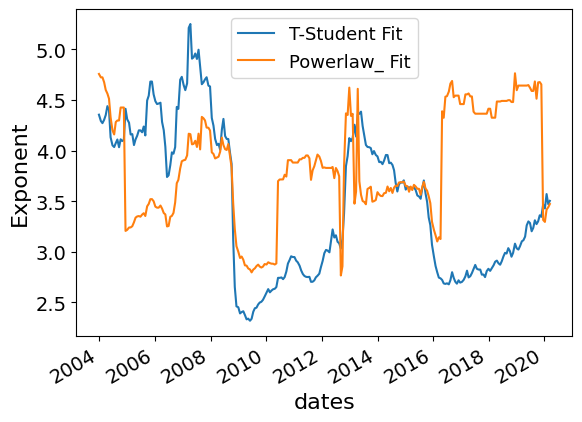

In [28]:
estimators = pd.DataFrame(estimators, columns= [ 'dates' , 'T-Student Fit ' , 'Powerlaw_ Fit'])
estimators.set_index('dates').plot () 
plt.ylabel ('Exponent')